## Chapter 8. 열 가공하기

In [ ]:
# 버전 안내
import pandas as pd
print(f'교재 권장 버전: Pandas 2.2.2')
print(f'현재 실행 버전: Pandas {pd.__version__}')

교재 권장 버전: Pandas 2.2.2
현재 실행 버전: Pandas 2.2.2


### 8.1. 열 가공하기

#### 8.1.1. 열 가공하기란?

📌 **열 가공하기**

- 원시 데이터에서 행은 사례(instance), 열은 분석에 쓰이는 **특성(feature)으로** 구성됨.  
- 추가적인 데이터 수집 없이 **기존 데이터를 가공해 새로운 유용한 특성을 만드는 과정**이 *열 가공하기*.



#### 8.1.2. 다양한 데이터 가공하기 소개

- 연산·열 가공 함수·불리언 마스킹·범주화 등을 활용해 새로운 특성 생성

### 8.2. 다양한 연산으로 열 가공하기

#### 8.2.1. 객체 간 연산으로 열 가공하기

- 각 열을 연산해 새로운 열을 만드는 과정

In [ ]:
# 코드 8-1. 연산으로 열 가공하기 실습 예제 코드
import pandas as pd
data1 = [['A', 0.1, 50, 0, 5], ['B', 0.25, 400, 40, 99],
         ['C', 0.35, 100, 10, 36], ['D', 0.3, 300, 4, 91]]
df1 = pd.DataFrame(data1, columns=['선수', '적중률', '타수', '홈런', '안타'])
df1

,선수,적중률,타수,홈런,안타
0,A,0.10,50,0,5
1,B,0.25,400,40,99
2,C,0.35,100,10,36
3,D,0.30,300,4,91


In [ ]:
# 코드 8-2. 안타 열과 타수 열을 연산해 타율 열 생성하기
df1['타율'] = df1['안타'] / df1['타수']
df1

,선수,적중률,타수,홈런,안타,타율
0,A,0.10,50,0,5,0.100000
1,B,0.25,400,40,99,0.247500
2,C,0.35,100,10,36,0.360000
3,D,0.30,300,4,91,0.303333


#### 8.2.2. 객체 내 연산으로 열 가공하기

- 다양한 통계 함수를 사용해 새로운 열을 만드는 과정

In [ ]:
# 코드 8-3. 통계 함수를 사용해 열 가공하기 실습 예제 코드
data2 = [[10, 0, 20], [30, 30, 40], [0, 20, 10], [30, 10, 10]]
idx = ['2024-05-01', '2024-05-02', '2024-05-03', '2024-05-04']
df2 = pd.DataFrame(data2, index=idx, columns=['A품목', 'B품목', 'C품목'])
df2

,A품목,B품목,C품목
2024-05-01,10,0,20
2024-05-02,30,30,40
2024-05-03,0,20,10
2024-05-04,30,10,10


In [ ]:
# 코드 8-4. 모든 품목의 일 판매량의 합과 일 판매량의 누적 합계를 열로 생성하기
df2['일판매량'] = df2.sum(axis=1)
df2['누적판매'] = df2['일판매량'].cumsum()
df2

,A품목,B품목,C품목,일판매량,누적판매
2024-05-01,10,0,20,30,30
2024-05-02,30,30,40,100,130
2024-05-03,0,20,10,30,160
2024-05-04,30,10,10,50,210


#### 8.2.3. 수학적 연산으로 열 가공하기

- 삼각함수, log 등의 수학적 함수를 적용해 **새로운 열을 생성하는 과정**  
- 주로 **넘파이 함수**를 활용해 수행

<br>

[표 8-1] 수학의 연산을 수행하는 넘파이 함수들

| 함수 | 설명 |
| :--- | :--- |
| **np.log** | 자연로그(밑이 e) |
| **np.log2** | 밑이 2인 log |
| **np.log10** | 밑이 10인 log |
| **np.sin** | 삼각함수 sin |
| **np.cos** | 삼각함수 cos |
| **np.tan** | 삼각함수 tan |
| **np.arcsin** | 삼각함수 sin의 역함수 arcsin |
| **np.arccos** | 삼각함수 cos의 역함수 arccos |
| **np.arctan** | 삼각함수 tan의 역함수 arctan |
| **np.exp** | e의 지수함수 |
| **np.square** | 제곱 |
| **np.sqrt** | 제곱근 |

In [ ]:
# 코드 8-5. 수학적 연산으로  가공하기 실습 예제 코드
df3 = pd.DataFrame([[1, 2], [2, 4], [3, 8], [4, 16]], columns=['x', 'y'])
df3

,x,y
0,1,2
1,2,4
2,3,8
3,4,16


In [ ]:
# 코드 8-6. y의 데이터에 자연로그 적용하기
import numpy as np
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리 출력
df3['log_y'] = np.log(df3['y'])
df3

,x,y,log_y
0,1,2,0.693
1,2,4,1.386
2,3,8,2.079
3,4,16,2.773


### 8.3. 순위 매기기

#### 8.3.1. 순위 매기기(rank)

<img src=https://i.postimg.cc/L62JSzCc/image.png, width=600>

⭐ 판다스 `rank`

데이터 프레임이나 시리즈의 순위를 매기는 함수

<br>

⭐ `rank` 함수의 주요 매개변수와 인수, 기본값

```python
df.rank(method='average', ascending=True, pct=False)
```

- **method**: 동점자 처리 방식을 지정한다.

- **ascending**: 오름차순과 내림차순을 지정한다. 기본값은 오름차순이다.

- **pct**: 순위를 반환할지 백분위수(percentile)를 반환할지 지정한다. 기본값이 False이기에 순위를 반환하며 True는 백분위수를 반환한다.

<br>

In [ ]:
# 코드 8-7. 순위 매기기 실습 예제 코드
import pandas as pd
pd.options.display.float_format = None # 소수점 출력 옵션 리셋
s = pd.Series([90, 70, 80, 60], index=list('ABCD'))
s

,0
A,90
B,70
C,80
D,60


In [ ]:
# 코드 8-8. 시리즈 s의 순위 매기기
s.rank()

,0
A,4.0
B,2.0
C,3.0
D,1.0


In [ ]:
# 코드 8-9. 시리즈 s의 순위를 내림차순으로 매기고 정수로 변환
s.rank(ascending=False).astype('int')

,0
A,1
B,3
C,2
D,4


In [ ]:
# 코드 8-10. 시리즈 s의 백분위수 반환하기
s.rank(pct=True)

,0
A,1.00
B,0.50
C,0.75
D,0.25


#### 8.3.2. rank 함수의 다양한 동점자 처리 방식

[표 8-2] 매개변수 method로 지정하는 다양한 동점자 처리 방식

| 인수 | 동점자 처리 방식 |
| :--- | :--- |
| **'average'** | 평균 순위 (두 명이 공동 1등일 때 모두 1.5등), 기본값(default) |
| **'min'** | 최저 순위 (두 명이 공동 1등일 때 모두 1등) |
| **'max'** | 최대 순위 (두 명이 공동 1등일 때 모두 2등) |
| **'first'** | 순서에 따른 순위 (두 명이 공동 1등일 때 먼저 출현한 행이 1등) |
| **'dense'** | 밀집한 순위 ('min'과 비슷하나 공동 1등이 존재해도 다음 순위로 2등을 부여) |

<br>

In [ ]:
# 코드 8-11. 동점자 처리 실습 예제 코드
import pandas as pd
data = [['김판다', 82, 17], ['권보아', 95, 17], ['강승주', 95, 18],
        ['안지선', 72, 18], ['조민영', 72, 19], ['최진환', 95, 19]]
df = pd.DataFrame(data, columns=['이름', '점수', '나이'])
df

,이름,점수,나이
0,김판다,82,17
1,권보아,95,17
2,강승주,95,18
3,안지선,72,18
4,조민영,72,19
5,최진환,95,19


In [ ]:
# 코드 8-12. 다양한 방법으로 동점자 처리하기
df['average'] = df['점수'].rank(ascending=False)
df['min'] = df['점수'].rank(ascending=False, method='min')
df['max'] = df['점수'].rank(ascending=False, method='max')
df['first'] = df['점수'].rank(ascending=False, method='first')
df['dense'] = df['점수'].rank(ascending=False, method='dense')
df

,이름,점수,나이,average,min,max,first,dense
0,김판다,82,17,4.0,4.0,4.0,4.0,2.0
1,권보아,95,17,2.0,1.0,3.0,1.0,1.0
2,강승주,95,18,2.0,1.0,3.0,2.0,1.0
3,안지선,72,18,5.5,5.0,6.0,5.0,3.0
4,조민영,72,19,5.5,5.0,6.0,6.0,3.0
5,최진환,95,19,2.0,1.0,3.0,3.0,1.0


### 8.4. 불리언 마스킹

- 조건(True/False)에 따라 **새 값을 부여하는 기법**  

- 기존 데이터를 **조건 기반으로 변환해 특성을 만드는 방식**

- 판다스는 다양한 방법으로 불리언 마스킹을 지원

<img src=https://i.postimg.cc/Hs9BW9pQ/image.png, width=600>

#### 8.4.1. 불리언 인덱싱으로 불리언 마스킹

- 불리언 인덱싱으로 조건에 맞는 값을 부여해 **새로운 열을 만들면 불리언 마스킹**


In [ ]:
# 코드 8-13. 불리언 마스킹 실습 예제 코드
import pandas as pd
data = {'국어': {'가': 86, '나': 79, '다': 93, '라': 80},
        '영어': {'가': 90, '나': 10, '다': 50, '라': 95}}
df = pd.DataFrame(data)
df

,국어,영어
가,86,90
나,79,10
다,93,50
라,80,95


In [ ]:
# 코드 8-14. 불리언 인덱싱으로 불리언 마스킹 수행하기
df1 = df.copy() # 원본 보존을 위해 df를 복제한 df1 생성
df1.loc[df1['영어'] >= 90, '영어평점'] = 4.5
df1

,국어,영어,영어평점
가,86,90,4.5
나,79,10,NaN
다,93,50,NaN
라,80,95,4.5


#### 8.4.2. 판다스 함수로 불리언 마스킹(mask, where)

<img src=https://i.postimg.cc/nLB154wq/image.png, width=600>

⭐ 판다스 `mask`

조건문이 True인 부분의 값을 변환하는 함수. 즉 불리언 마스킹을 수행하는 함수

<br>

⭐ 판다스 `where`

조건문이 False인 부분의 값을 변환하는 함수. 즉 불리언 마스킹을 수행하는 함수

<br>

⭐ `mask` 함수의 주요 매개변수와 인수, 기본값

```python
df.mask(cond, other=nan)
```

- **cond**: 조건문처럼 작동하는 True와 False의 배열을 입력한다.

- **other**: 조건문이 True일 때 변환될 값을 지정한다. 기본값은 NaN이다.

<br>

⭐ `where` 함수는 `mask` 함수와 반대로 조건문이 False일 때 변환될 값을 입력한다.

<br>

In [ ]:
# 코드 8-15. mask 함수를 국어 열에 적용해 80점 미만을 NaN으로 변환
df['국어'].mask(df['국어'] < 80)

,국어
가,86.0
나,NaN
다,93.0
라,80.0


In [ ]:
# 코드 8-16. where 함수를 국어 열에 적용해 80점 이상을 NaN으로 변환
cond1 = df['국어'] < 80
df['국어'].where(cond1)

,국어
가,NaN
나,79.0
다,NaN
라,NaN


In [ ]:
# 코드 8-17. mask 함수로 코드 8-16과 동일한 결과 반환하기
df['국어'].mask(~cond1)

,국어
가,NaN
나,79.0
다,NaN
라,NaN


In [ ]:
# 코드 8-18. 국어가 80점 미만일 때 '낙제'로 변환
df['국어'].mask(cond1, other='낙제')

,국어
가,86
나,낙제
다,93
라,80


In [ ]:
# 코드 8-19. 영어가 90점 이상인 사람은 국어 점수에 5점씩 추가점을 부여
cond2 = df['영어'] >= 90
df['국어'].mask(cond2, df['국어'] + 5)

,국어
가,91
나,79
다,93
라,85


[그림 8-11] mask 함수의 구조

<img src=https://i.postimg.cc/Rhy648WH/image.png, width=600>

In [ ]:
# 코드 8-20. 영어가 90점 이상인 사람의 국어 점수 평균 구하기
df['국어'].where(cond2).mean()

np.float64(83.0)

#### 8.4.3. 넘파이의 np.where 함수로 불리언 마스킹


⭐ 넘파이 `np.where`

True와 False에 따라 각각 값을 부여하는 함수

<br>

⭐ `np.where` 함수의 주요 매개변수와 인수, 기본값

```python
np.where(condition, x, y)
```
- **condition**: 불(bool) 자료형 배열을 입력한다. 즉, 조건문을 입력받는 매개변수이다.

- **x**: True일 때 부여할 값을 입력한다. 단일 값 또는 배열을 입력한다.

- **y**: False일 때 부여할 값을 입력한다. 단일 값 또는 배열을 입력한다.

<br>

In [ ]:
# 코드 8-21. 국어가 80점 미만일 때는 낙제, 80점 이상이면 이수를 부여
df2 = df.copy() # 원본 보존을 위해 df를 복제한 df2 생성
df2['국어'].mask(cond1, '낙제').mask(~cond1, '이수')

,국어
가,이수
나,낙제
다,이수
라,이수


In [ ]:
# 코드 8-22. np.where 함수로 코드 8-21과 같은 결과 수행
import numpy as np
np.where(cond1, '낙제', '이수')

array(['이수', '낙제', '이수', '이수'], dtype='<U2')

In [ ]:
# 코드 8-23. np.where 함수의 결과를 국어평가 열로 생성하기
df2['국어평가'] = np.where(cond1, '낙제', '이수')
df2

,국어,영어,국어평가
가,86,90,이수
나,79,10,낙제
다,93,50,이수
라,80,95,이수


#### 8.4.4. 넘파이의 np.select 함수로 불리언 마스킹

⭐ 넘파이 `np.select`

여러 개의 조건문을 입력해 각 조건에 해당하는 값을 반환하는 함수

<br>

⭐ `np.select` 함수의 주요 매개변수와 인수, 기본값

```python
np.select(condlist, choicelist, default=0)
```

- **condlist**: 조건문들을 리스트로 묶어 입력한다.

- **choicelist**: 조건문을 만족할 때 반환할 값을 리스트로 묶어 입력한다.

- **default**: condlist의 모든 조건에서 False일 때 부여할 값을 지정한다.

<br>

In [ ]:
# 코드 8-24. 불리언 마스킹으로 여러 종류의 값을 반환하기 실습 예제 코드
df3 = df.copy() # 원본 보존을 위해 df를 복제한 df3 생성
cond3 = df3['국어'] >= 90
cond4 = df3['국어'] >= 80

In [ ]:
# 코드 8-25. 국어가 90이상은 A, 80이상은 B, 80미만은 C를 부여(np.where)
np.where(cond4, np.where(cond3, 'A', 'B'), 'C')

array(['B', 'C', 'A', 'B'], dtype='<U1')

In [ ]:
# 코드 8-26. 국어가 90이상은 A, 80이상은 B, 80미만은 C를 부여(mask)
df3['국어'].mask(cond3, 'A').mask(~cond3 & cond4, 'B').mask(~cond4, 'C')

,국어
가,B
나,C
다,A
라,B


In [ ]:
# 코드 8-27. 국어가 90이상은 A, 80이상은 B, 80미만은 C를 부여(np.select)
np.select([cond3, ~cond3 & cond4], ['A', 'B'], 'C')

array(['B', 'C', 'A', 'B'], dtype='<U1')

In [ ]:
# 코드 8-28. 결과를 df3의 국어학점 열로 생성하기
df3['국어학점'] = np.select([cond3, cond4], ['A', 'B'], 'C')
df3

,국어,영어,국어학점
가,86,90,B
나,79,10,C
다,93,50,A
라,80,95,B


In [ ]:
# 코드 8-29. 모두 80이상은 수, 한 과목만 80이상은 우, 아니면 미를 부여
cond4 = df3['국어'] >= 80
cond5 = df3['영어'] >= 80
df3['학생평가'] = np.select([cond4 & cond5, cond4 | cond5], ['수', '우'], '미')
df3

,국어,영어,국어학점,학생평가
가,86,90,B,수
나,79,10,C,미
다,93,50,A,우
라,80,95,B,수


[그림 8-13] np.select 함수의 구조

<img src=https://i.postimg.cc/nzYfHQMz/image.png, width=600>


### 8.5. 수치형 데이터의 범주화

- 수치형 데이터를 범주형으로 변환할 때 **cut**(구간 기준), **qcut**(백분위수 기준)을 활용

#### 8.5.1. 수치로 구간을 나누어 범주화(cut)

<img src=https://i.postimg.cc/LXm0V3L9/image.png, width=600>

⭐ 판다스 `cut`

수치를 기준으로 구간을 나누어 범주화(categorization)하는 함수

<br>

⭐ `cut` 함수의 주요 매개변수와 인수, 기본값

```python
pd.cut(x, bins, right=True, labels=None)
```

- **x**: 범주화를 수행할 배열을 입력한다. 반드시 1차원이어야 한다.

- **bins**: 구간을 나누는 기준을 입력한다. 정수를 입력하면 균등 분할한다.

- **right**: 구간에서 우측 경계를 포함할지 여부를 지정한다.

- **labels**: 구간의 이름을 지정한다. `bins`로 생성된 구간 개수와 같아야 한다.

<br>

In [ ]:
# 코드 8-30. df의 국어 점수를 0, 80, 90, 100의 구간으로 분류
pd.cut(df['국어'], bins=[0, 80, 90, 100])

,국어
가,"(80, 90]"
나,"(0, 80]"
다,"(90, 100]"
라,"(0, 80]"


In [ ]:
# 코드 8-31. 각 구간의 이름을 C, B, A로 명명
pd.cut(df['국어'], bins=[0, 80, 90, 100], labels=['C', 'B', 'A'])

,국어
가,B
나,C
다,A
라,C


#### 8.5.2. 백분위수로 구간을 나누어 범주화(qcut)

<img src=https://i.postimg.cc/L8p9MrMb/image.png, width=600>

⭐ 판다스 `qcut`

백분위수를 기준으로 구간을 나누어 범주화(categorization)하는 함수

<br>

⭐ `qcut` 함수의 주요 매개변수와 인수, 기본값

```python
pd.qcut(x, q, right=True, labels=None)
```

- **x**: 범주화를 수행할 배열을 입력한다. 반드시 1차원이어야 한다.

- **q**: 구간을 나누는 기준을 입력한다. 정수를 입력하면 균등 분할한다.

- **right**: 구간에서 우측 경계를 포함할지 여부를 지정한다.

- **labels**: 구간의 이름을 지정한다. `q`로 생성된 구간 개수와 같아야 한다.

<br>

In [ ]:
# 코드 8-32. 영어 점수 상위 25%는 A, 25~75%는 B, 75%미만은 C를 부여
pd.qcut(df['영어'], q=[0, 0.25, 0.75, 1], labels=['C', 'B', 'A'])

,영어
가,B
나,C
다,B
라,A


[그림 8-18] 불리언 마스킹과 수치형 데이터의 범주화 정리

1. **조건을 만족할 때는 값을 부여하고, 아니면 NaN을 부여하는 새로운 열 생성**

    예) 점수가 50점 이상이면 4.5를 부여하고, 아니면 NaN을 부여하는 평점 열 생성

   → 불리언 인덱싱으로 배정

2. **기존 데이터에서 조건을 만족할 때만 다른 값을 부여**

    예) 국어 열이 50보다 낮은 점수는 5점을 올려주기

    → `mask`, `where`

3. **True, False에 각각 서로 다른 값을 부여**

    예) 50보다 높으면 A, 낮으면 B를 부여

    → `np.where`

4. **여러 조건문을 사용해 각 조건에 맞는 세 종류 이상의 값을 부여**

    예) 영어와 국어가 모두 80보다 높으면 A, 한 과목만 80보다 높으면 B, 아니면 C를 부여

    → `np.select`

5. **수치형 데이터인 하나의 열을 기반으로 범주화를 수행하는 경우**

    예) 영어 점수가 90 이상은 A, 80-90은 B, 70-80은 C, 70 미만은 D를 부여

    → `cut`, `qcut`

6. **특정 값을 다른 값으로 매핑하는 경우**

    예) 학점이 A면 4.0, 학점이 B면 3.0, 학점이 C면 2.0을 부여

    → `map`

<br>

### 엑셀 예제 8. 학생들의 키 몸무게 데이터 가공하기 (1)

In [ ]:
# 코드 8-33. 학생들의 키와 몸무게 엑셀 파일에서 데이터 프레임 불러오기
import pandas as pd
import numpy as np
pd.options.display.max_rows = 8 # 8행까지만 출력
pd.options.display.float_format = '{:.2f}'.format # 소수점 둘째 자리 출력
url1 = 'https://github.com/panda-kim/book1/blob/main/12student.xlsx?raw=true'
df_student = pd.read_excel(url1)
df_student

,학생코드,나이,키,몸무게
0,남001,17,186.00,63.50
1,여001,14,151.00,39.90
2,여002,15,156.30,47.20
3,여003,16,163.80,58.00
...,...,...,...,...
96,남054,15,175.50,59.00
97,남055,13,175.00,58.00
98,남056,15,172.00,51.80
99,여044,16,159.00,45.00


In [ ]:
# 코드 8-34. df_student의 기술 통계 확인
df_student.describe()

,나이,키,몸무게
count,100.00,100.00,100.00
mean,15.07,166.37,60.19
std,1.66,8.71,12.56
min,13.00,147.00,39.00
25%,13.75,160.00,52.00
50%,15.00,166.10,58.50
75%,16.25,172.20,65.25
max,18.00,187.60,106.30


In [ ]:
# 코드 8-35. 15세 이하는 중학교, 나머지는 고등학교로 분류한 학교 열 생성
cond1 = df_student['나이'] <= 15
df_student['학교'] = np.where(cond1, '중학교', '고등학교')
df_student

,학생코드,나이,키,몸무게,학교
0,남001,17,186.00,63.50,고등학교
1,여001,14,151.00,39.90,중학교
2,여002,15,156.30,47.20,중학교
3,여003,16,163.80,58.00,고등학교
...,...,...,...,...,...
96,남054,15,175.50,59.00,중학교
97,남055,13,175.00,58.00,중학교
98,남056,15,172.00,51.80,중학교
99,여044,16,159.00,45.00,고등학교


In [ ]:
# 코드 8-36. 키의 순위를 구해 키순위 열 생성(동점자는 최소 순위 부여)
df_student['키순위'] = df_student['키'].rank(ascending=False, method='min')
df_student

,학생코드,나이,키,몸무게,학교,키순위
0,남001,17,186.00,63.50,고등학교,2.00
1,여001,14,151.00,39.90,중학교,95.00
2,여002,15,156.30,47.20,중학교,88.00
3,여003,16,163.80,58.00,고등학교,64.00
...,...,...,...,...,...,...
96,남054,15,175.50,59.00,중학교,16.00
97,남055,13,175.00,58.00,중학교,17.00
98,남056,15,172.00,51.80,중학교,27.00
99,여044,16,159.00,45.00,고등학교,79.00


In [ ]:
# 코드 8-37. BMI를 구해서 BMI 열 생성
df_student['BMI'] = df_student['몸무게'] / ((df_student['키'] / 100) ** 2)
df_student

,학생코드,나이,키,몸무게,학교,키순위,BMI
0,남001,17,186.00,63.50,고등학교,2.00,18.35
1,여001,14,151.00,39.90,중학교,95.00,17.50
2,여002,15,156.30,47.20,중학교,88.00,19.32
3,여003,16,163.80,58.00,고등학교,64.00,21.62
...,...,...,...,...,...,...,...
96,남054,15,175.50,59.00,중학교,16.00,19.16
97,남055,13,175.00,58.00,중학교,17.00,18.94
98,남056,15,172.00,51.80,중학교,27.00,17.51
99,여044,16,159.00,45.00,고등학교,79.00,17.80


In [ ]:
# 코드 8-38. 18.5미만 저체중, 18.5~23 정상, 23~25 비만전단계, 25~ 비만으로 분류
df_student['BMI분류'] = pd.cut(
    df_student['BMI'], bins=[0, 18.5, 23, 25, 100],
    labels=['저체중', '정상', '비만전단게', '비만'], right=False
)
df_student

,학생코드,나이,키,몸무게,학교,키순위,BMI,BMI분류
0,남001,17,186.00,63.50,고등학교,2.00,18.35,저체중
1,여001,14,151.00,39.90,중학교,95.00,17.50,저체중
2,여002,15,156.30,47.20,중학교,88.00,19.32,정상
3,여003,16,163.80,58.00,고등학교,64.00,21.62,정상
...,...,...,...,...,...,...,...,...
96,남054,15,175.50,59.00,중학교,16.00,19.16,정상
97,남055,13,175.00,58.00,중학교,17.00,18.94,정상
98,남056,15,172.00,51.80,중학교,27.00,17.51,저체중
99,여044,16,159.00,45.00,고등학교,79.00,17.80,저체중


In [ ]:
# 코드 8-39. 180 이상은 1, 나머지는 NaN을 부여한 장신구분 열 생성
cond2 = df_student['키'] >= 180
df_student.loc[cond2, '장신구분'] = 1
df_student

,학생코드,나이,키,몸무게,학교,키순위,BMI,BMI분류,장신구분
0,남001,17,186.00,63.50,고등학교,2.00,18.35,저체중,1.00
1,여001,14,151.00,39.90,중학교,95.00,17.50,저체중,NaN
2,여002,15,156.30,47.20,중학교,88.00,19.32,정상,NaN
3,여003,16,163.80,58.00,고등학교,64.00,21.62,정상,NaN
...,...,...,...,...,...,...,...,...,...
96,남054,15,175.50,59.00,중학교,16.00,19.16,정상,NaN
97,남055,13,175.00,58.00,중학교,17.00,18.94,정상,NaN
98,남056,15,172.00,51.80,중학교,27.00,17.51,저체중,NaN
99,여044,16,159.00,45.00,고등학교,79.00,17.80,저체중,NaN


In [ ]:
# 코드 8-40. 180이상의 평균 몸무게
df_student['몸무게'].where(cond2).mean()

np.float64(79.16)

In [ ]:
# 코드 8-41. 몸무게의 상위 10%를 가 군, 하위 20% 다 군, 나머지 나 군으로 분류
df_student['분류'] = pd.qcut(
    df_student['몸무게'], q=[0, 0.2, 0.9, 1], labels=['다', '나', '가']
)
df_student

,학생코드,나이,키,몸무게,학교,키순위,BMI,BMI분류,장신구분,분류
0,남001,17,186.00,63.50,고등학교,2.00,18.35,저체중,1.00,나
1,여001,14,151.00,39.90,중학교,95.00,17.50,저체중,NaN,다
2,여002,15,156.30,47.20,중학교,88.00,19.32,정상,NaN,다
3,여003,16,163.80,58.00,고등학교,64.00,21.62,정상,NaN,나
...,...,...,...,...,...,...,...,...,...,...
96,남054,15,175.50,59.00,중학교,16.00,19.16,정상,NaN,나
97,남055,13,175.00,58.00,중학교,17.00,18.94,정상,NaN,나
98,남056,15,172.00,51.80,중학교,27.00,17.51,저체중,NaN,나
99,여044,16,159.00,45.00,고등학교,79.00,17.80,저체중,NaN,다


In [ ]:
# 코드 8-42. 중학생 저체중은 A, 고등학생 저체중은 B 나머지는 C인 저체중 열 생성
cond3 = df_student['학교'] == '중학교'
cond4 = df_student['BMI분류'] == '저체중'
df_student['저체중'] = np.select([cond3 & cond4, cond4], ['A', 'B'], 'C')
df_student

,학생코드,나이,키,몸무게,학교,키순위,BMI,BMI분류,장신구분,분류,저체중
0,남001,17,186.00,63.50,고등학교,2.00,18.35,저체중,1.00,나,B
1,여001,14,151.00,39.90,중학교,95.00,17.50,저체중,NaN,다,A
2,여002,15,156.30,47.20,중학교,88.00,19.32,정상,NaN,다,C
3,여003,16,163.80,58.00,고등학교,64.00,21.62,정상,NaN,나,C
...,...,...,...,...,...,...,...,...,...,...,...
96,남054,15,175.50,59.00,중학교,16.00,19.16,정상,NaN,나,C
97,남055,13,175.00,58.00,중학교,17.00,18.94,정상,NaN,나,C
98,남056,15,172.00,51.80,중학교,27.00,17.51,저체중,NaN,나,A
99,여044,16,159.00,45.00,고등학교,79.00,17.80,저체중,NaN,다,B


In [ ]:
# 코드 8-43. 결과를 엑셀 파일로 저장
df_student.to_excel('ch08_student.xlsx', index=False)

### 8.6. 결측값 처리하기 2

- **전·후방 값으로 결측값 대체**: `ffill`, `bfill`

- **보간**: `interpolate`


#### 8.6.1. 전후방의 데이터로 결측값 대체하기(ffill, bfill)

<img src=https://i.postimg.cc/J0snGJTx/image.png, width=600>

⭐ 판다스 `ffill`, `bfill`

전후방의 데이터로 결측값을 대체하는 함수

<br>

⭐ `ffill` 함수의 주요 매개변수와 인수, 기본값

```python
df.ffill(axis=0, limit=None)
```

- **axis**: 축을 지정한다. 기본값은 0이며 열의 전방 데이터로 NaN을 대체한다.

- **limit**: 대체할 최대 연속 NaN의 개수를 제한한다.

<br>

In [ ]:
# 코드 8-44. ffill, bfill 함수 실습 예제 코드
import pandas as pd
data1 = {'A': [float('nan'), 2, float('nan')], 'B': [0, float('nan'), 4],
         'C': [1, float('nan'), 5], 'D': [float('nan'), 3, 6]}
df1 = pd.DataFrame(data1)
df1

,A,B,C,D
0,NaN,0.00,1.00,NaN
1,2.00,NaN,NaN,3.00
2,NaN,4.00,5.00,6.00


In [ ]:
# 코드 8-45. 열의 전방 데이터로 결측값 대체하기
df1.ffill()

,A,B,C,D
0,NaN,0.00,1.00,NaN
1,2.00,0.00,1.00,3.00
2,2.00,4.00,5.00,6.00


In [ ]:
# 코드 8-46. 행의 전방 데이터로 결측값 대체하기
df1.ffill(axis=1)

,A,B,C,D
0,NaN,0.00,1.00,1.00
1,2.00,2.00,2.00,3.00
2,NaN,4.00,5.00,6.00


In [ ]:
# 코드 8-47. 열의 후방 데이터로 결측값 대체하기
df1.bfill()

,A,B,C,D
0,2.00,0.00,1.00,3.00
1,2.00,4.00,5.00,3.00
2,NaN,4.00,5.00,6.00


In [ ]:
# 코드 8-48. 행의 후방 데이터로 결측값을 1회 대체하기
df1.bfill(axis=1, limit=1)

,A,B,C,D
0,0.00,0.00,1.00,NaN
1,2.00,NaN,3.00,3.00
2,4.00,4.00,5.00,6.00


#### 8.6.2. 결측값 보간하기(interpolate)

<img src=https://i.postimg.cc/7hKWQJDV/image.png, width=600>

⭐ 판다스 `interpolate`

보간법을 사용하여 결측값을 대체하는 함수

<br>

⭐ `interpolate` 함수의 주요 매개변수와 인수, 기본값

```python
df.interpolate(method='linear', axis=0)
```

- **method**: 사용할 보간 방법을 지정한다. 기본값은 'linear'이고 선형 보간법이다.

- **axis**: 축을 지정한다.

<br>

In [ ]:
# 코드 8-49. interpolate 함수 실습 예제 코드
import pandas as pd
s = pd.Series([0, 1, float('nan'), 3], index=list('ABCD'))
s

,0
A,0.00
B,1.00
C,NaN
D,3.00


In [ ]:
# 코드 8-50. s의 결측값을 선형 보간법으로 보간하기
s.interpolate()

,0
A,0.00
B,1.00
C,2.00
D,3.00


### 8.7. 행 간의 연산으로 열 가공하기

<img src=https://i.postimg.cc/TP8fcFtC/image.png, width=600>

- 판다스는 **shift**, **diff**, **pct_change** 등 다양한 함수로 **반복문 없이 다른 행과의 연산**을 수행

#### 8.7.1. 데이터 이동하기(shift)

<img src=https://i.postimg.cc/rF6B3xSH/image.png, width=600>

⭐ 판다스 `shift`

데이터를 정해진 칸만큼 이동시키는 함수

<br>

⭐ `shift` 함수의 주요 매개변수와 인수, 기본값

```python
df.shift(periods=1, freq=None, axis=0)
```

- **periods**: 이동할 칸 수를 지정한다. 기본값은 한 칸 이동한다.

- **freq**: 시계열 데이터를 이동할 때 이동 주기를 지정한다.

- **axis**: 축을 지정해 이동 방향을 지정한다.

<br>

In [ ]:
# 코드 8-51. shift 함수 실습 예제 코드
import pandas as pd
data = {'날짜': ['01/01', '01/02', '01/03', '01/04', '01/05'],
        '가격': [1000, 1200, 900, 1200, 1500]}
df = pd.DataFrame(data, columns=['날짜', '가격'])
df

,날짜,가격
0,01/01,1000
1,01/02,1200
2,01/03,900
3,01/04,1200
4,01/05,1500


In [ ]:
# 코드 8-52. 가격 열의 데이터를 세로 방향으로 한 칸 이동하기
df['가격'].shift()

,가격
0,NaN
1,1000.00
2,1200.00
3,900.00
4,1200.00


In [ ]:
# 코드 8-53. 일자별 가격 변동 구하기
df['가격'] - df['가격'].shift()

,가격
0,NaN
1,200.00
2,-300.00
3,300.00
4,300.00


#### 8.7.2. 행 간의 차이 구하기(diff)

<img src=https://i.postimg.cc/k5tN06Nz/image.png, width=600>



⭐ 판다스 `diff`

행 간의 연산으로 차이를 구하는 함수

<br>

⭐ `diff` 함수의 주요 매개변수와 인수, 기본값

```python
df.diff(periods=1, freq=None, axis=0)
```

- **periods**: 이동할 칸 수를 지정한다. 기본값은 한 칸 이동한다.

- **freq**: 시계열 데이터를 이동할 때 이동 주기를 지정한다.

- **axis**: 축을 지정해 이동 방향을 지정한다.

<br>

In [ ]:
# 코드 8-54. diff 함수로 일자별 가격 변동 구하기
df['가격'].diff()

,가격
0,NaN
1,200.00
2,-300.00
3,300.00
4,300.00


In [ ]:
# 코드 8-55. diff 함수로 2일 전 대비 가격 변동 구하기
df['가격'].diff(2)

,가격
0,NaN
1,NaN
2,-100.00
3,0.00
4,600.00


#### 8.7.3. 행 간의 변동률 구하기(pct_change)

<img src=https://i.postimg.cc/MGbHfzzf/image.png, width=600>

⭐ 판다스 `pct_change`

행 간의 연산으로 변동률을 구하는 함수

<br>

⭐ `pct_change` 함수의 주요 매개변수와 인수, 기본값

```python
df.pct_change(periods=1, freq=None, axis=0)
```

- **periods**: 이동할 칸 수를 지정한다. 기본값은 한 칸 이동한다.

- **freq**: 시계열 데이터를 이동할 때 이동 주기를 지정한다.

- **axis**: 축을 지정해 이동 방향을 지정한다.

<br>

In [ ]:
# 코드 8-56. pct_change 함수로 일자별 가격 변동률 구하기
df['가격'].pct_change()

,가격
0,NaN
1,0.20
2,-0.25
3,0.33
4,0.25


### 엑셀 예제 9. 삼성전자 주가 분석

In [ ]:
# 코드 8-57. 삼성전자 주가 데이터를 엑셀 파일에서 데이터 프레임으로 불러오기
import pandas as pd
pd.options.display.max_rows = 6 # 6행까지만 출력
pd.options.display.float_format = '{:.3f}'.format # 소수점 셋째 자리 출력
url2 = 'https://github.com/panda-kim/book1/blob/main/13SEC.xlsx?raw=true'
df_sec = pd.read_excel(url2, index_col='Date', parse_dates=['Date'])
df_sec

,Open,High,Low,Close,Volume
Date,,,,,
2018-01-02,51380,51400,50780,51020,169485
2018-01-03,52540,52560,51420,51620,200270
2018-01-04,52120,52180,50640,51080,233909
...,...,...,...,...,...
2023-12-26,76100,76700,75700,76600,13164909
2023-12-27,76700,78000,76500,78000,20651042
2023-12-28,77700,78500,77500,78500,17797536


<Axes: xlabel='Date'>

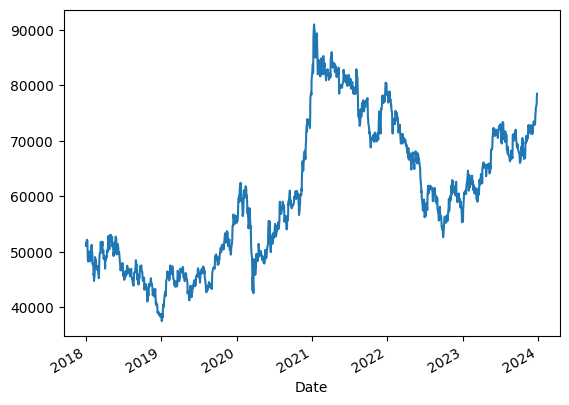

In [ ]:
# 코드 8-58. 삼성전자 6년간의 종가를 그래프로 그리기
df_sec['Close'].plot()

In [ ]:
# 코드 8-59. 주가 등락률을 구해 Change 열로 생성하기
df_sec['Change'] = df_sec['Close'].pct_change()
df_sec

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2018-01-02,51380,51400,50780,51020,169485,NaN
2018-01-03,52540,52560,51420,51620,200270,0.012
2018-01-04,52120,52180,50640,51080,233909,-0.010
...,...,...,...,...,...,...
2023-12-26,76100,76700,75700,76600,13164909,0.009
2023-12-27,76700,78000,76500,78000,20651042,0.018
2023-12-28,77700,78500,77500,78500,17797536,0.006


In [ ]:
# 코드 8-60. 2일 연속 3.5% 이상 상승한 날짜 찾기
cond = df_sec['Close'].pct_change() >= 0.035
df_sec[cond & cond.shift()]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-03-25,48950,49600,47150,48650,52735922,0.036
2020-11-16,64000,66700,63900,66300,36354334,0.049


In [ ]:
# 코드 8-61. 코드 8-59 결과 중 2020-03-25 전후의 주가 확인하기
df_sec.loc['2020-03-20':'2020-03-26']

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-03-20,44150,45500,43550,45400,49730008,0.057
2020-03-23,42600,43550,42400,42500,41701626,-0.064
2020-03-24,43850,46950,43050,46950,49801908,0.105
2020-03-25,48950,49600,47150,48650,52735922,0.036
2020-03-26,49000,49300,47700,47800,42185129,-0.017
